# Taller introductorio

In [36]:
import pandas as pd
import geopandas as gpd
print("Salió todo de lujo")

Salió todo de lujo


In [37]:
data_path = 'data/'

## Levantamos dos archivos

In [38]:
col = gpd.read_file(data_path + 'recorrido-colectivos')
col.crs = {'init': 'epsg:4326'}
col.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shape_id    2066 non-null   int64   
 1   direction_  2066 non-null   int64   
 2   route_id    2066 non-null   int64   
 3   agency_id   2066 non-null   int64   
 4   route_shor  2066 non-null   object  
 5   route_long  2066 non-null   object  
 6   route_desc  2066 non-null   object  
 7   route_type  2066 non-null   int64   
 8   service_id  2066 non-null   int64   
 9   trip_id     2066 non-null   object  
 10  trip_heads  2066 non-null   object  
 11  trip_short  2066 non-null   object  
 12  block_id    2066 non-null   object  
 13  exceptiona  2066 non-null   int64   
 14  linea       2066 non-null   object  
 15  ramal       2058 non-null   object  
 16  geometry    2066 non-null   geometry
dtypes: geometry(1), int64(7), object(9)
memory usage: 274.5+ KB


/home/nicolas/anaconda3/envs/ateneo/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [39]:
radios = gpd.read_file(data_path + 'radios_eph_CABA_utf8', encoding='utf-8')
radios.dropna(subset=['geometry'], inplace=True)
radios.info()
radios.crs = {'init': 'epsg:22183'}
radios.to_crs({'init': 'epsg:4326'}, inplace=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3551 entries, 0 to 3552
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          3551 non-null   float64 
 1   eph_codagl  3551 non-null   object  
 2   eph_aglome  3551 non-null   object  
 3   codaglo     3551 non-null   object  
 4   aglomerado  3551 non-null   object  
 5   codprov     3551 non-null   object  
 6   nomprov     3551 non-null   object  
 7   coddepto    3551 non-null   object  
 8   localidade  3551 non-null   object  
 9   frac2010    3551 non-null   object  
 10  radio2010   3551 non-null   object  
 11  tiporad     3551 non-null   object  
 12  entidades   3551 non-null   object  
 13  geometry    3551 non-null   geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 416.1+ KB


/home/nicolas/anaconda3/envs/ateneo/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Vamos a hacer un plot

<AxesSubplot:>

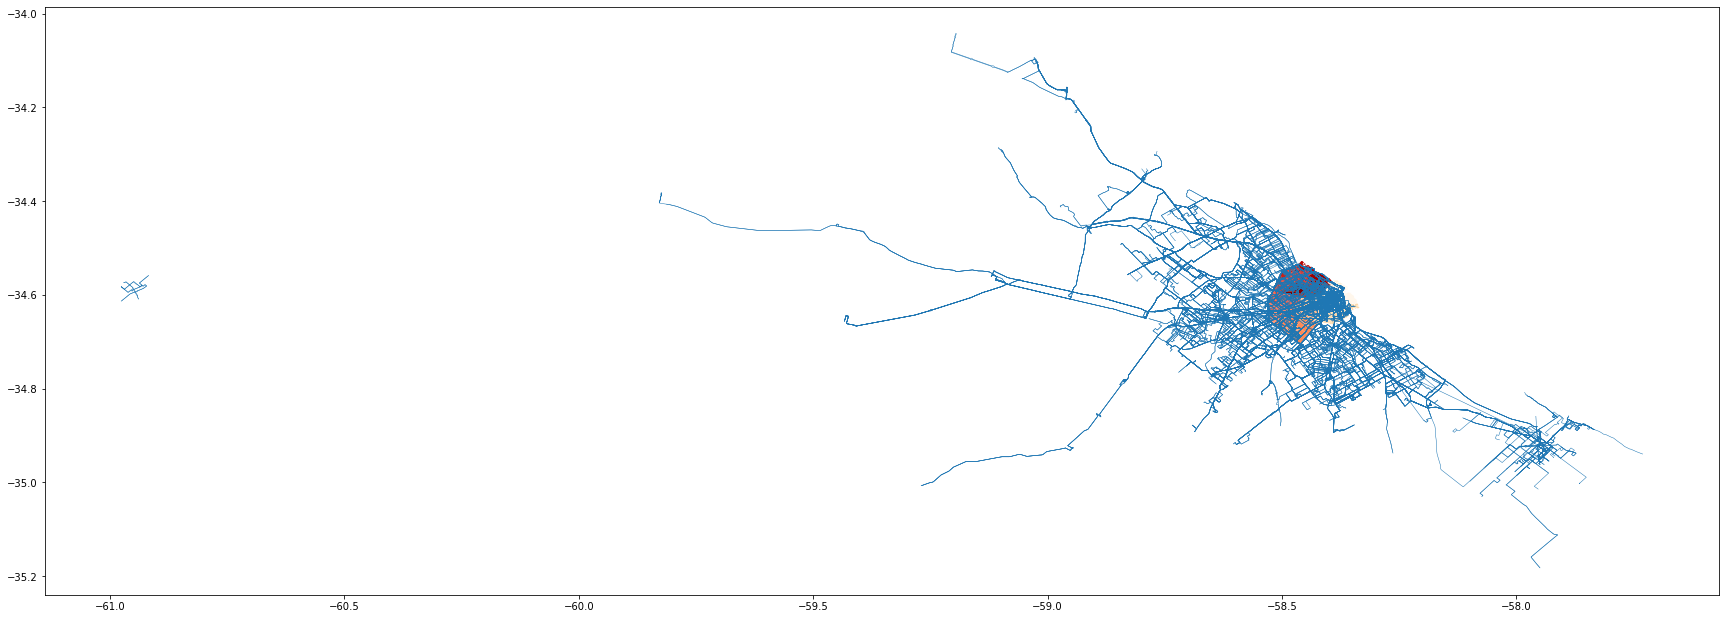

In [40]:
ax = radios.plot('coddepto', cmap='OrRd', figsize=(30, 30), aspect=1)
col.plot(ax=ax, linewidth=0.5, linestyle='-', aspect=1)

## Vamos a seleccionar los radios de una comuna (la 3 en este caso)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 254 entries, 527 to 780
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          254 non-null    float64 
 1   eph_codagl  254 non-null    object  
 2   eph_aglome  254 non-null    object  
 3   codaglo     254 non-null    object  
 4   aglomerado  254 non-null    object  
 5   codprov     254 non-null    object  
 6   nomprov     254 non-null    object  
 7   coddepto    254 non-null    object  
 8   localidade  254 non-null    object  
 9   frac2010    254 non-null    object  
 10  radio2010   254 non-null    object  
 11  tiporad     254 non-null    object  
 12  entidades   254 non-null    object  
 13  geometry    254 non-null    geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 29.8+ KB


<AxesSubplot:>

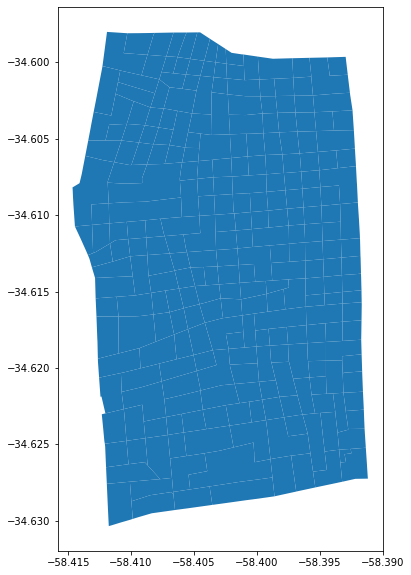

In [41]:
# Para seleccionar elementos en una tabla por el valor de una de sus columnas (atributos) usamos .loc
comuna_3 = radios.loc[radios['coddepto'] == '003', :].copy()
comuna_3.info()
comuna_3.plot(cmap=None, figsize=(10, 10))

In [42]:
def cuantos_colectivos_pasan_por_el_radio(x, recorridos):
    recorridos['intersects'] = recorridos['geometry'].apply(lambda geom: geom.intersects(x))
    colectivos_que_si = recorridos.loc[recorridos['intersects'] == 1, :]
    return len(colectivos_que_si)

In [43]:
comuna_3['movilidad'] = comuna_3['geometry'].apply(lambda x: cuantos_colectivos_pasan_por_el_radio(x,
                                                             col.copy()))
comuna_3['movilidad'].value_counts()

0     14
14    12
24    10
15    10
12     9
      ..
53     1
48     1
41     1
40     1
36     1
Name: movilidad, Length: 73, dtype: int64

In [44]:
comuna_3.sort_values(by=['movilidad'], ascending=False, inplace=True)
comuna_3.iloc[0]

id                                                          612
eph_codagl                                                   32
eph_aglome                                                 CABA
codaglo                                                    0001
aglomerado                                    Gran Buenos Aires
codprov                                                      02
nomprov                                  Ciudad de Buenos Aires
coddepto                                                    003
localidade           (02003010) Ciudad Autónoma de Buenos Aires
frac2010                                                     09
radio2010                                                    10
tiporad                                                       U
entidades                             (02003010 - 01) Balvanera
geometry      POLYGON ((-58.40602932726686 -34.6088422598084...
movilidad                                                   134
Name: 611, dtype: object

<AxesSubplot:>

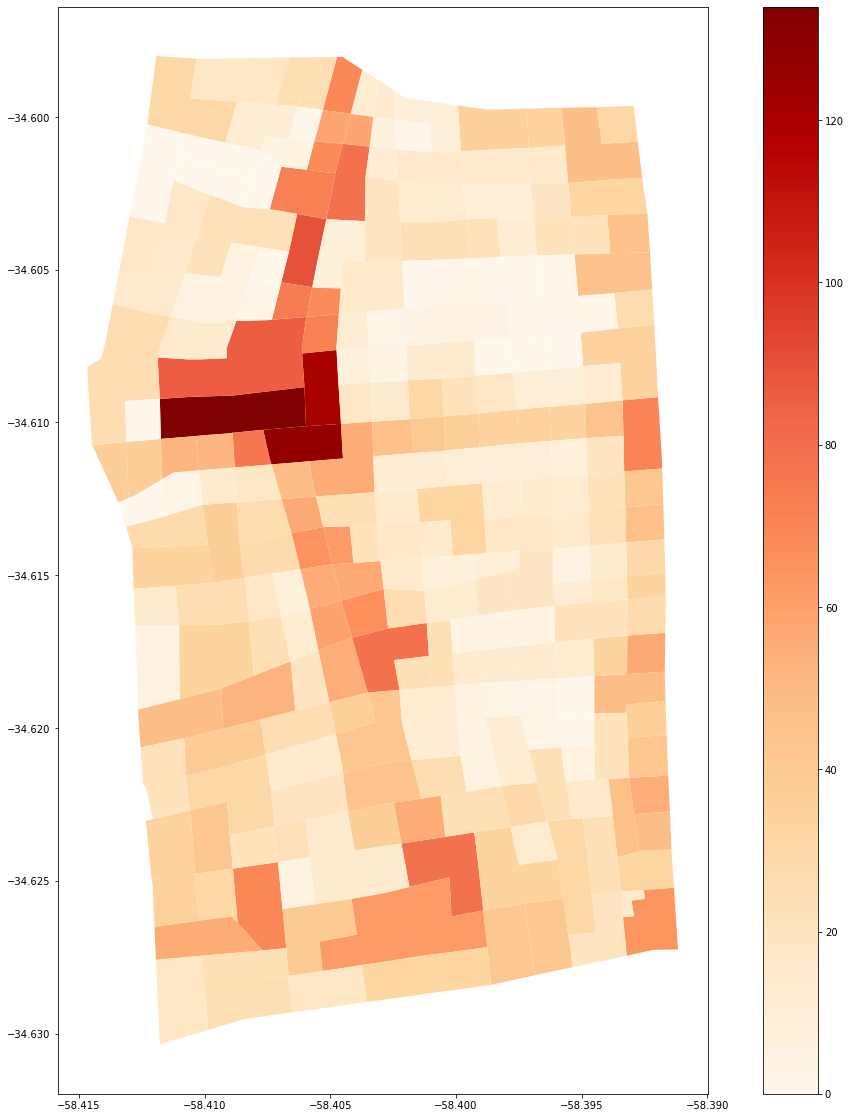

In [45]:
comuna_3.plot(column='movilidad', cmap='OrRd', legend=True, figsize=(20, 20))

## Qué pasa ahora si levantamos información de establecimientos educativos en CABA?

/home/nicolas/anaconda3/envs/ateneo/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    3596 non-null   int64   
 1   CUI         3596 non-null   object  
 2   CUEANEXO    3596 non-null   object  
 3   CUE         3596 non-null   object  
 4   ANEXO       3596 non-null   object  
 5   SECTOR      3596 non-null   float64 
 6   DOM_EDIFIC  3596 non-null   object  
 7   DOM_ESTABL  3596 non-null   object  
 8   NOMBRE_EST  3596 non-null   object  
 9   NOMBRE_ABR  3596 non-null   object  
 10  TELEFONO    3596 non-null   object  
 11  EMAIL       3596 non-null   object  
 12  CODPOST     3596 non-null   object  
 13  WEB_MEGCBA  3596 non-null   object  
 14  NIVMOD      3596 non-null   object  
 15  NIVELMODAL  3596 non-null   object  
 16  TIPEST      3596 non-null   object  
 17  DEPFUN      3596 non-null   object  
 18  DE          3596 non-null   float64 
 19

<AxesSubplot:>

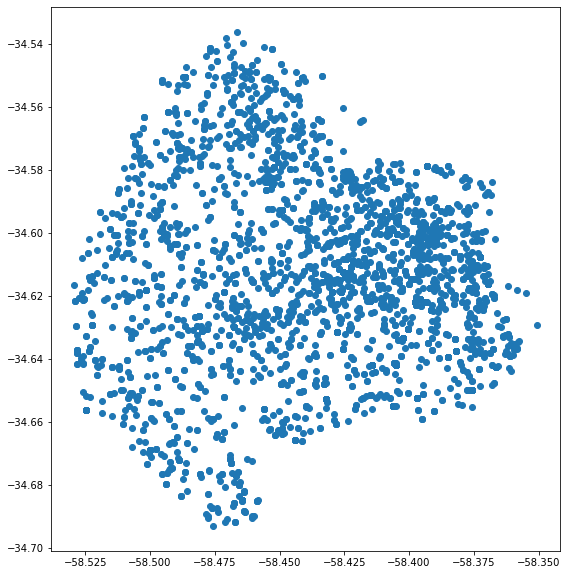

In [46]:
est_ed = gpd.read_file(data_path + 'establecimientos-educativos_v02', encoding='utf-8')
est_ed.crs = {'init': 'epsg:4326'}
est_ed.info()
est_ed.plot(cmap=None, figsize=(10, 10))

<AxesSubplot:>

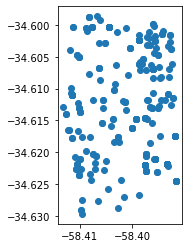

In [17]:
geometria_comuna_3 = comuna_3['geometry'].unary_union

est_ed['intersecta_comuna_3'] = est_ed['geometry'].apply(lambda x: geometria_comuna_3.contains(x))
est_ed_c3 = est_ed.loc[est_ed['intersecta_comuna_3'] == 1, :].copy()
est_ed_c3.plot(cmap=None)

In [48]:
def obtener_valor_de_movilidad(x, comuna_3):
    comuna_3['contains'] = comuna_3['geometry'].apply(lambda geom: geom.contains(x))
    comuna_3 = comuna_3.loc[comuna_3['contains'] == 1, :]
    if len(comuna_3) == 1:
        return comuna_3.iloc[0]['movilidad']
    else:
        return None

est_ed_c3['movilidad'] = est_ed_c3['geometry'].apply(lambda x: obtener_valor_de_movilidad(x,
                                                        comuna_3.copy()))

<AxesSubplot:>

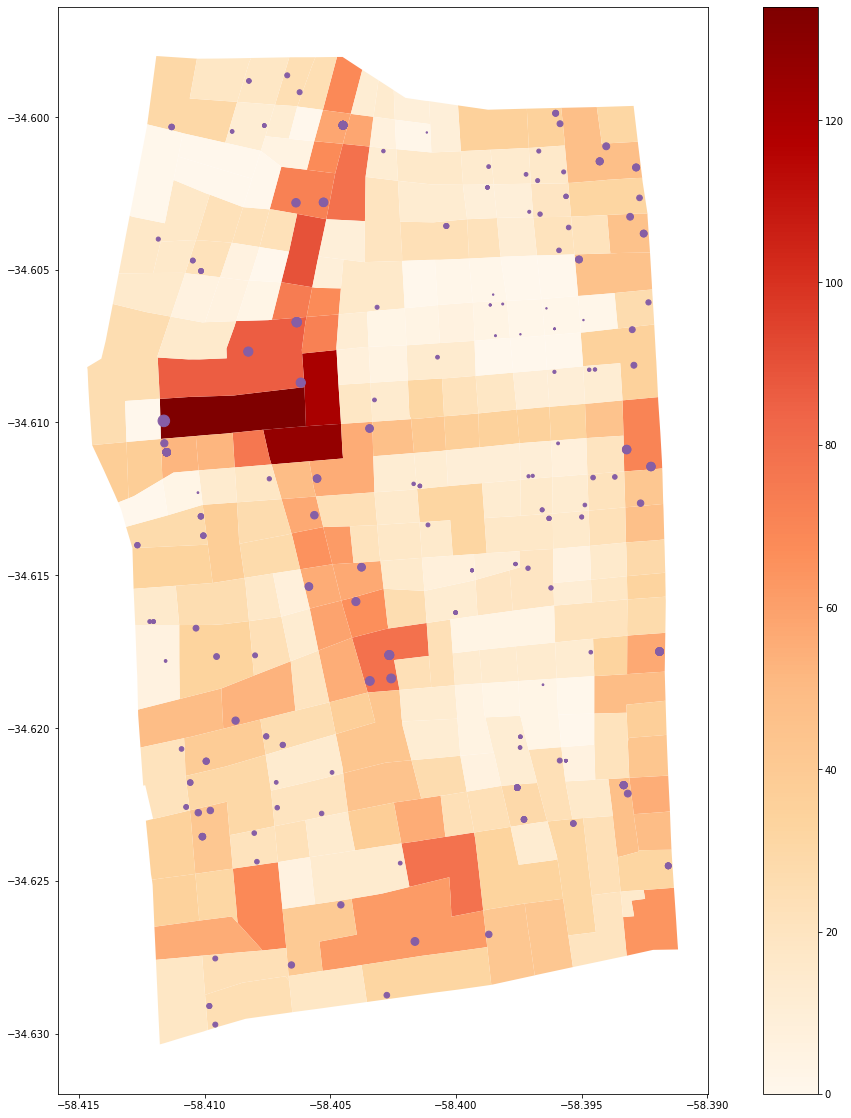

In [49]:
ax = comuna_3.plot(column='movilidad', cmap='OrRd', legend=True, figsize=(20, 20))
est_ed_c3.plot(ax=ax, markersize='movilidad', color='#865EA5')

### Cómo seguimos??:
    - sumar información de líneas de subte
    - sumar líneas de trenes
    - si se trabaja toda la CABA,  ¿debería normalizarse?
    - habría que tener en cuenta el tamaño del radio censal? Esto no lo tengo muy claro, capaz al introducir la variable tamaño generamos distorsión en los datos

## Y toda la ciudad?

In [23]:
import time
init = time.time()

caba = radios.copy()
caba['movilidad'] = caba['geometry'].apply(lambda x: cuantos_colectivos_pasan_por_el_radio(x,
                                                             r.copy()))
caba['movilidad'].value_counts()

duracion = time.time() - init
print("Tarde {0} segundos, {1} minutos".format(duracion, duracion/60))

Tarde 417.17064118385315 segundos, 6.952844019730886 minutos


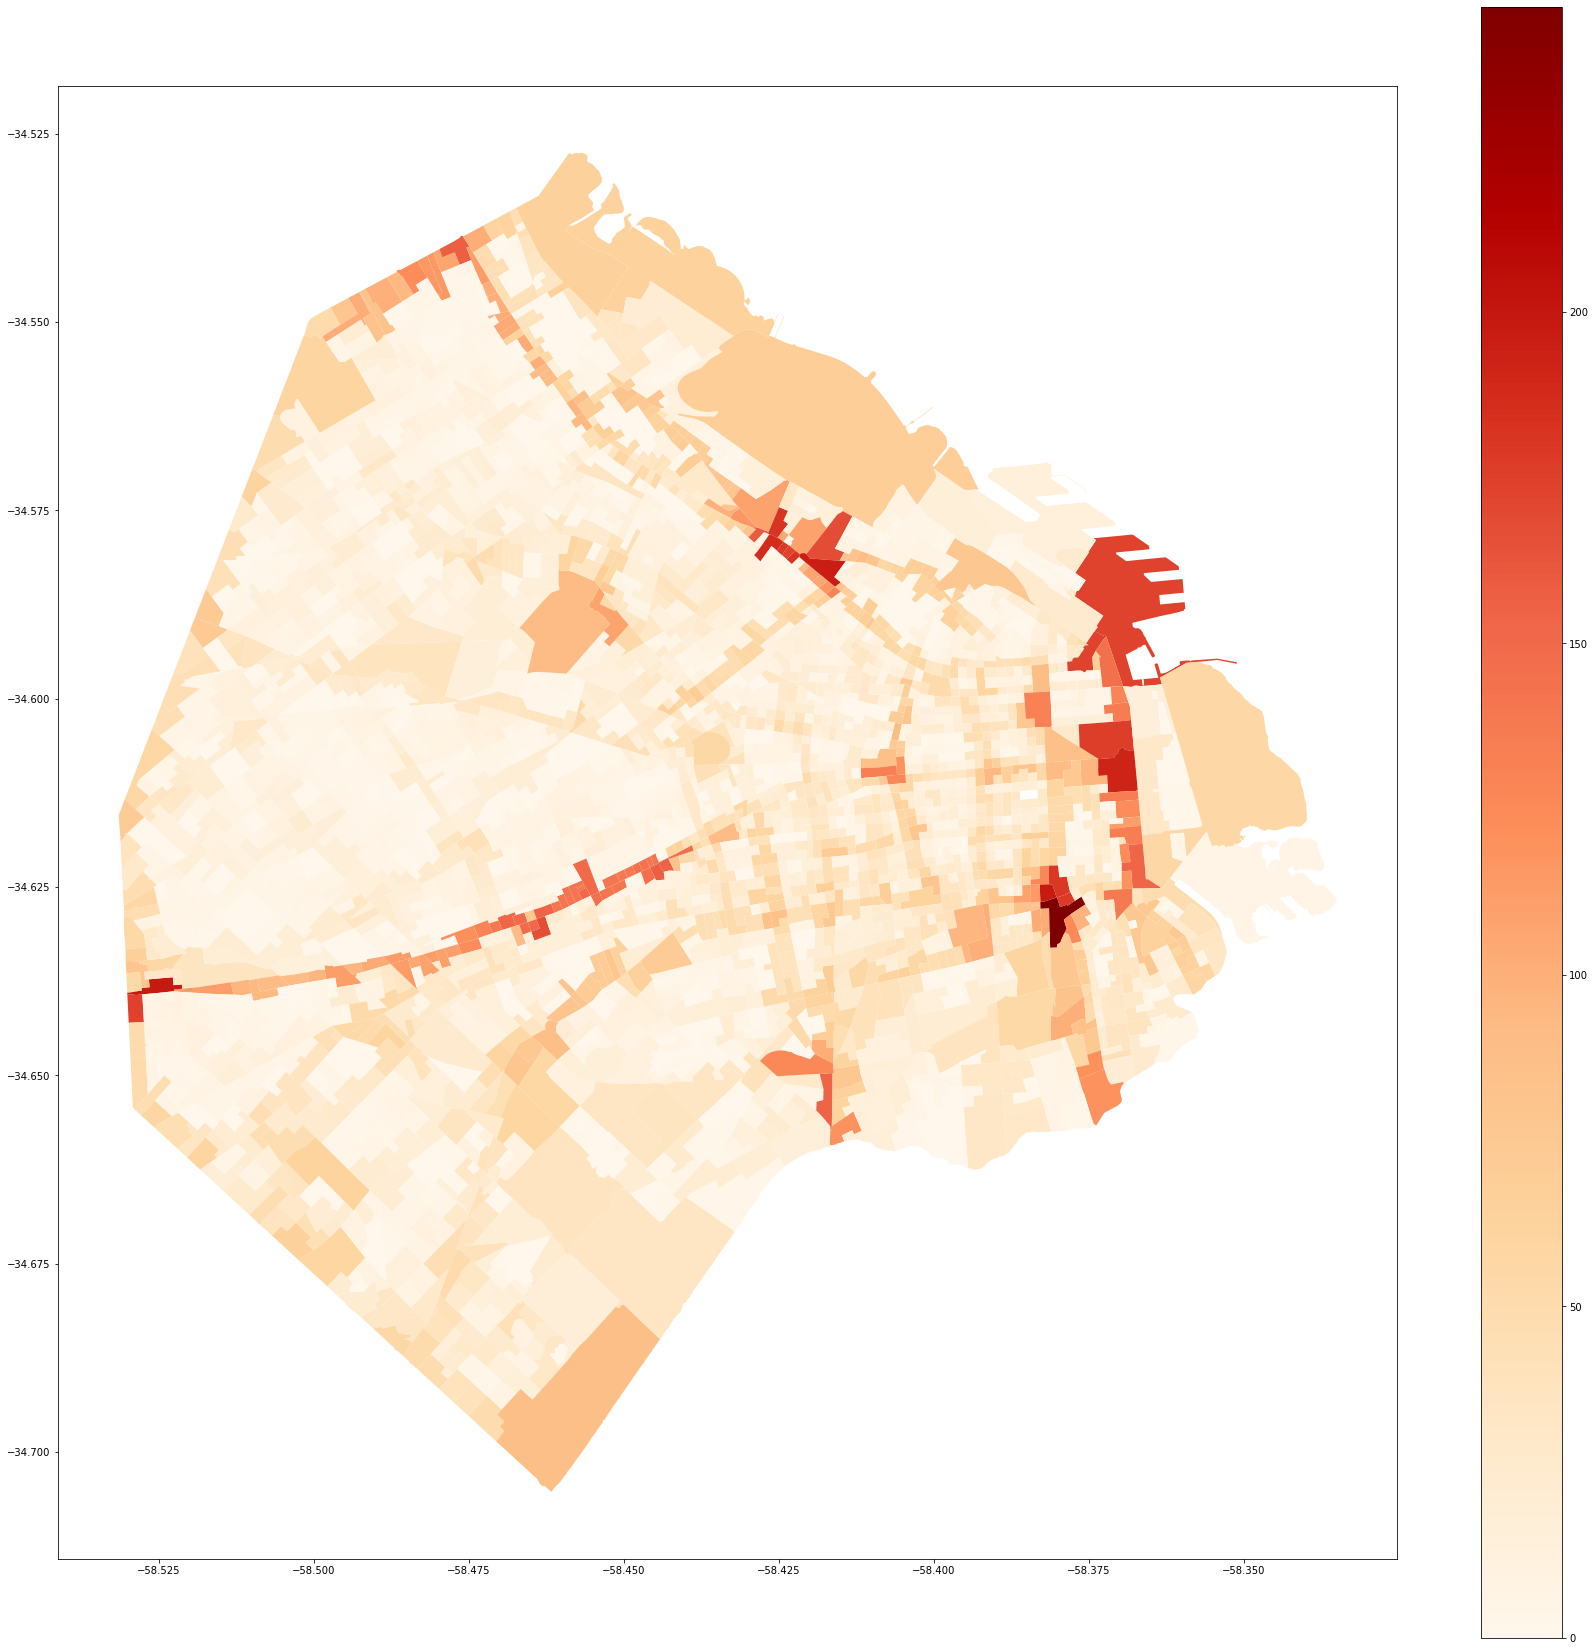

In [32]:
import matplotlib.pyplot as plt
caba.plot(column='movilidad', cmap='OrRd', legend=True, figsize=(30, 30))
plt.savefig('caba_movilidad.jpg')

In [26]:
caba.to_file(data_path + '/caba_movilidad', encoding='utf-8')